In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, KFold
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/water_potability.csv')

#EDA

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<ipython-input-77-b6dd9eb5b537>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette=["red", "turquoise"])


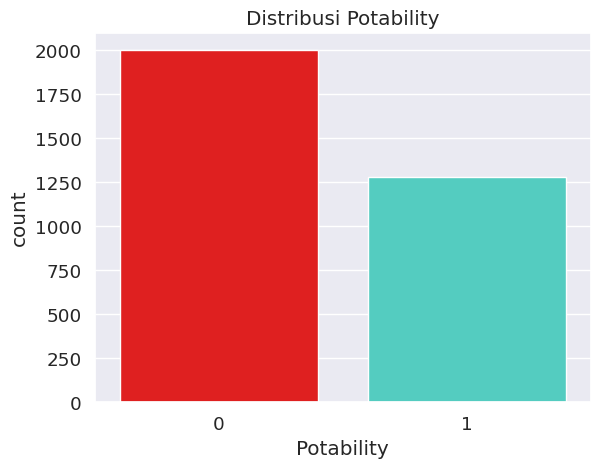

In [ ]:
# Plot distribusi target
sns.countplot(x='Potability', data=df, palette=["red", "turquoise"])
plt.title('Distribusi Potability')
plt.show()

In [ ]:
# Melihat apakah ada data yang kosong
df.isnull() .sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
# Menampilkan jumlah missing values sebelum penghapusan
print("\nMissing values di setiap kolom sebelum penghapusan:")
print(df.isnull().sum())


Missing values di setiap kolom sebelum penghapusan:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
# Menghilangkan baris dengan nilai null
df.dropna(inplace=True)

In [ ]:
# Memastikan tidak ada lagi missing values setelah penghapusan
print("\nMissing values di setiap kolom setelah penghapusan:")
print(df.isnull().sum())


Missing values di setiap kolom setelah penghapusan:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


#Korelasi

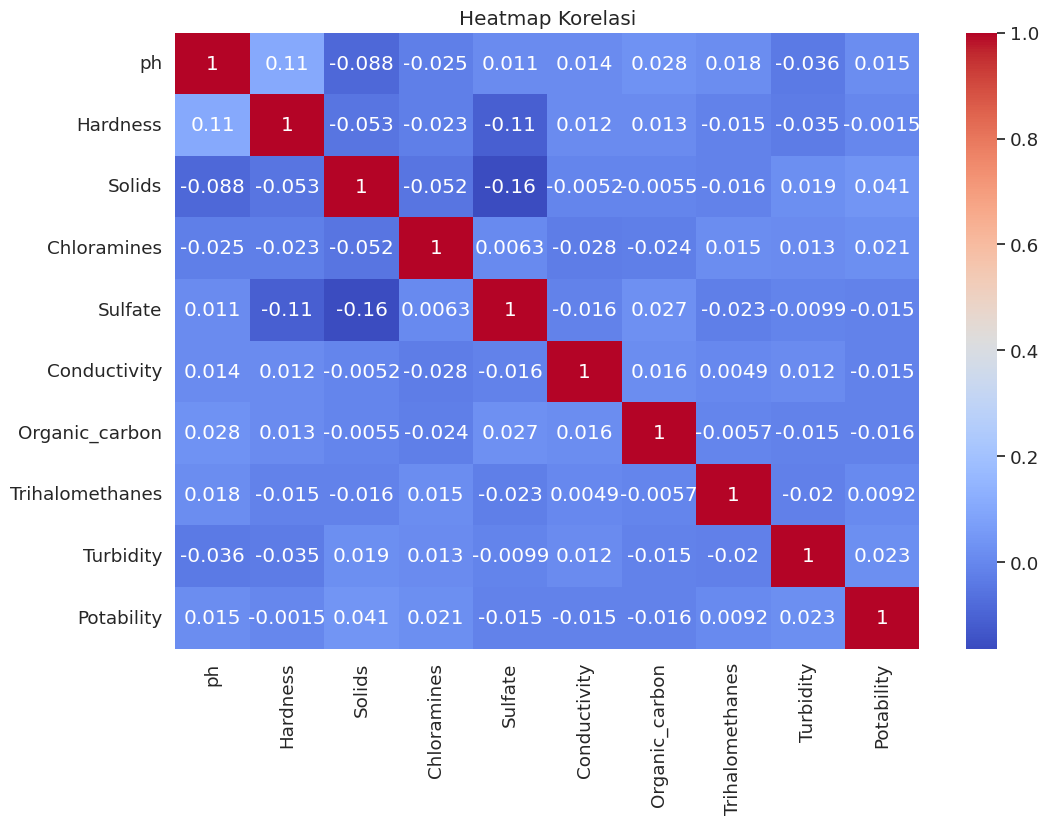

In [ ]:
# 3. Visualisasi Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
# Menampilkan isi Korelasi
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


#Preprocessing

In [ ]:
# Pemisahan fitur dan target
X = df.drop(columns=['Potability'])
y = df['Potability']

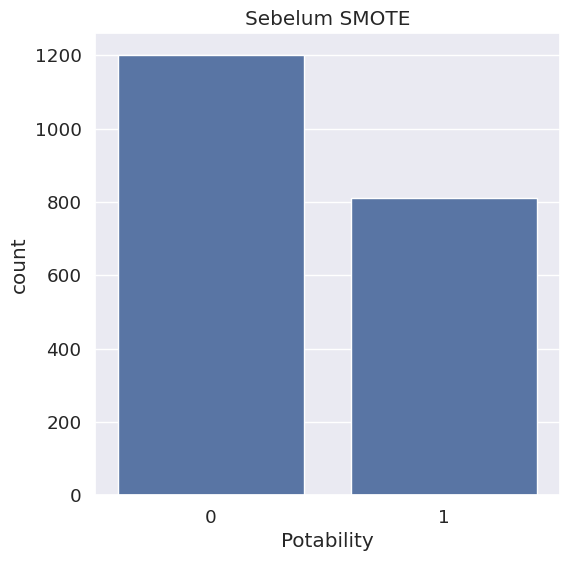

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.countplot(x=pd.Series(y))
plt.title('Sebelum SMOTE')
plt.show()

In [ ]:
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Handling data imbalance menggunakan SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

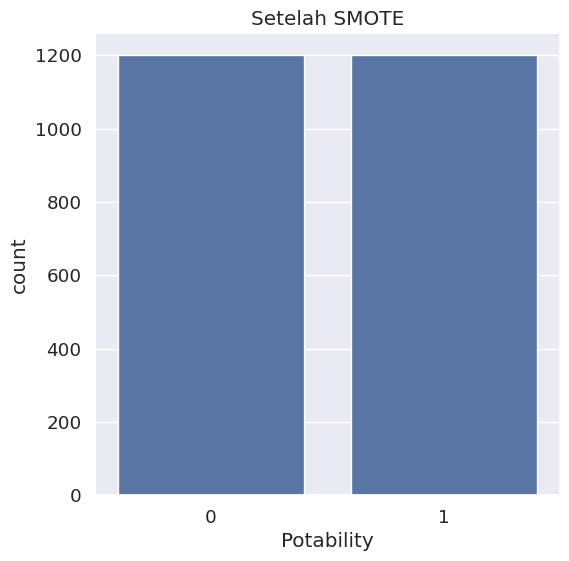

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.countplot(x=pd.Series(y_resampled))
plt.title('Setelah SMOTE')
plt.show()

In [ ]:
# Split data menjadi training, validation, dan testing
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [ ]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

#SVM

In [ ]:
# SVM Model
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# Evaluasi SVM
y_pred_svm = svm_model.predict(X_test)
print("SVM Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted'):.2f}")

SVM Evaluation:
Accuracy: 0.69
Precision: 0.70
Recall: 0.69
F1 Score: 0.69


In [ ]:
# Evaluasi SVM
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))
print("Laporan Klasifikasi SVM:")
print(classification_report(y_test, y_pred_svm))

Akurasi SVM: 0.6916666666666667
Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

           0       0.65      0.75      0.70       114
           1       0.74      0.63      0.68       126

    accuracy                           0.69       240
   macro avg       0.70      0.69      0.69       240
weighted avg       0.70      0.69      0.69       240



In [ ]:
# Evaluasi dengan K-Fold untuk SVM
svm_accuracy_scores = []
for train_index, test_index in kf.split(X_resampled):
    X_kf_train, X_kf_test = X_resampled[train_index], X_resampled[test_index]
    y_kf_train, y_kf_test = y_resampled[train_index], y_resampled[test_index]

    svm_model.fit(X_kf_train, y_kf_train)
    y_kf_pred = svm_model.predict(X_kf_test)
    svm_accuracy_scores.append(accuracy_score(y_kf_test, y_kf_pred))

print(f"SVM K-Fold Accuracy Scores: {svm_accuracy_scores}")
print(f"SVM Mean Accuracy Score: {np.mean(svm_accuracy_scores):.2f}")


SVM K-Fold Accuracy Scores: [0.69375, 0.66875, 0.69375, 0.7020833333333333, 0.6708333333333333]
SVM Mean Accuracy Score: 0.69


In [ ]:
# Hyperparameter Tuning untuk SVM berdasarkan akurasi
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid_accuracy = GridSearchCV(SVC(random_state=0), param_grid_svm, cv=5, scoring='accuracy')
svm_grid_accuracy.fit(X_train, y_train)
print(f"Best Parameters for SVM (Accuracy): {svm_grid_accuracy.best_params_}")

Best Parameters for SVM (Accuracy): {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
# Evaluasi SVM
y_pred_svm = svm_model.predict(X_test)
print("SVM Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted'):.2f}")

SVM Evaluation:
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1 Score: 0.78


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluasi SVM
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))
print("Laporan Klasifikasi SVM:")
print(classification_report(y_test, y_pred_svm))

Akurasi SVM: 0.7791666666666667
Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       114
           1       0.82      0.75      0.78       126

    accuracy                           0.78       240
   macro avg       0.78      0.78      0.78       240
weighted avg       0.78      0.78      0.78       240



In [ ]:
# Menggunakan evaluasi untuk menentukan kategori berdasarkan SVM dengan Akurasi
svm_accuracy_score = accuracy_score(y_test, y_pred_svm) * 100
threshold_svm_accuracy = 50
if svm_accuracy_score > threshold_svm_accuracy:
    print("Kualitas air berdasarkan SVM dikategorikan sebagai baik.")
else:
    print("Kualitas air berdasarkan SVM tidak memenuhi standar untuk dikategorikan sebagai baik.")


Kualitas air berdasarkan SVM dikategorikan sebagai baik.


#Catboost

In [ ]:
# CatBoost Model
catboost_model = CatBoostClassifier(random_state=0, verbose=0)
catboost_model.fit(X_train, y_train)

In [ ]:
# Evaluasi CatBoost
y_pred_catboost = catboost_model.predict(X_test)
print("CatBoost Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_catboost):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_catboost, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_catboost, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_catboost, average='weighted'):.2f}")

CatBoost Evaluation:
Accuracy: 0.70
Precision: 0.71
Recall: 0.70
F1 Score: 0.70


In [ ]:
# Evaluasi CatBoost
print("\nAkurasi CatBoost:", accuracy_score(y_test, y_pred_catboost))
print("Laporan Klasifikasi CatBoost:")
print(classification_report(y_test, y_pred_catboost))


Akurasi CatBoost: 0.7
Laporan Klasifikasi CatBoost:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       114
           1       0.75      0.65      0.69       126

    accuracy                           0.70       240
   macro avg       0.70      0.70      0.70       240
weighted avg       0.71      0.70      0.70       240



In [ ]:
# Evaluasi dengan K-Fold untuk CatBoost menggunakan akurasi
catboost_accuracy_scores = []
for train_index, test_index in kf.split(X_resampled):
    X_kf_train, X_kf_test = X_resampled[train_index], X_resampled[test_index]
    y_kf_train, y_kf_test = y_resampled[train_index], y_resampled[test_index]

    catboost_model.fit(X_kf_train, y_kf_train)
    y_kf_pred = catboost_model.predict(X_kf_test)
    catboost_accuracy_scores.append(accuracy_score(y_kf_test, y_kf_pred))

print(f"CatBoost K-Fold Accuracy Scores: {catboost_accuracy_scores}")
print(f"CatBoost Mean Accuracy Score: {np.mean(catboost_accuracy_scores):.2f}")


CatBoost K-Fold Accuracy Scores: [0.6875, 0.7333333333333333, 0.7541666666666667, 0.7041666666666667, 0.70625]
CatBoost Mean Accuracy Score: 0.72


In [ ]:
# Hyperparameter Tuning untuk CatBoost berdasarkan akurasi
param_grid_catboost = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [100, 200, 300]
}

catboost_grid_accuracy = GridSearchCV(CatBoostClassifier(random_state=0, verbose=0), param_grid_catboost, cv=5, scoring='accuracy')
catboost_grid_accuracy.fit(X_train, y_train)
print(f"Best Parameters for CatBoost (Accuracy): {catboost_grid_accuracy.best_params_}")


Best Parameters for CatBoost (Accuracy): {'depth': 8, 'iterations': 300, 'learning_rate': 0.2}


In [ ]:
# Evaluasi CatBoost
y_pred_catboost = catboost_model.predict(X_test)
print("CatBoost Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_catboost):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_catboost, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_catboost, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_catboost, average='weighted'):.2f}")

CatBoost Evaluation:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96


In [ ]:
# Evaluasi CatBoost
print("\nAkurasi CatBoost:", accuracy_score(y_test, y_pred_catboost))
print("Laporan Klasifikasi CatBoost:")
print(classification_report(y_test, y_pred_catboost))


Akurasi CatBoost: 0.9583333333333334
Laporan Klasifikasi CatBoost:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       114
           1       0.96      0.96      0.96       126

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240



In [ ]:
# Menggunakan evaluasi untuk menentukan kategori berdasarkan CatBoost dengan Akurasi
catboost_accuracy_score = accuracy_score(y_test, y_pred_catboost) * 100
threshold_catboost_accuracy = 50
if catboost_accuracy_score > threshold_catboost_accuracy:
    print("Kualitas air berdasarkan CatBoost dikategorikan sebagai baik.")
else:
    print("Kualitas air berdasarkan CatBoost tidak memenuhi standar untuk dikategorikan sebagai baik.")


Kualitas air berdasarkan CatBoost dikategorikan sebagai baik.
